# Homework 1

In [1]:
!pip install numpy
!pip install matplotlib
!pip install qutip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 37.8 MB/s eta 0:00:00


In [70]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

## Problem 1 - Numerical representation of the transmon qubit

Reference: J. Koch et al., "Charge-insensitive qubit design derived from the Cooper pair box," Phys. Rev. A **76**, 042319 (2007).

The Hamiltonian of a charge qubit is given by
$$\hat{H} = 4 E_C (\hat{n} - n_g)^2 - E_J \cos{\hat{\varphi}}$$
where $E_C = e^2 / (2C_\Sigma)$ is the charging energy, $n_g$ is the offset charge, and $E_J$ is the Josephson energy. Here, $\hat{n} = \sum_{n}n|n\rangle\langle n|$ is the number operator (number of Cooper pairs in the qubit island), $\hat{\varphi}$ is the phase operator across the Josephson junction. Note that $e^{i\hat{\varphi}} |n\rangle = |n - 1\rangle$.

### (a)
Express the numerical Hamiltonian using QuTiP as a function of $E_C$, $E_J$, and $n_g$. Keep the dimension of the Hilbert space to `N=10`.

In [42]:
# constant
N = 21
E_c = 1
E_j = 10
n_g = 10

# photon number operator
a = destroy(N)
n = a.dag() * a

# Hamiltonian
arr = np.empty((0, N), int)
for i in range(1, N, 1):
  arr = np.append(arr, np.array([[int(i==j) for j in range(N)]]), axis=0)
arr = np.append(arr, np.array([[0 for j in range(N)]]), axis=0)

Ph = Qobj(arr)+Qobj(arr).dag()
H = 4*E_c*(n-n_g*qeye(N))**2 - (E_j/2)*Ph

In [43]:
H

Quantum object: dims = [[21], [21]], shape = (21, 21), type = oper, isherm = True
Qobj data =
[[400.  -5.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [ -5. 324.  -5.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.  -5. 256.  -5.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.  -5. 196.  -5.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.  -5. 144.  -5.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.  -5. 100.  -5.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.  -5.  64.  -5.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.  -5.  36.  -5.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.

$ \\ \left(\begin{matrix}400.0 & -5.0 & 0.0 & 0.0 & 0.0 & \cdots & 0.0 & 0.0 & 0.0 & 0.0 & 0.0\\-5.0 & 324.0 & -5.0 & 0.0 & 0.0 & \cdots & 0.0 & 0.0 & 0.0 & 0.0 & 0.0\\0.0 & -5.0 & 256.0 & -5.0 & 0.0 & \cdots & 0.0 & 0.0 & 0.0 & 0.0 & 0.0\\0.0 & 0.0 & -5.0 & 196.0 & -5.0 & \cdots & 0.0 & 0.0 & 0.0 & 0.0 & 0.0\\0.0 & 0.0 & 0.0 & -5.0 & 144.0 & \cdots & 0.0 & 0.0 & 0.0 & 0.0 & 0.0\\\vdots & \vdots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \vdots & \vdots & \vdots\\0.0 & 0.0 & 0.0 & 0.0 & 0.0 & \cdots & 144.0 & -5.0 & 0.0 & 0.0 & 0.0\\0.0 & 0.0 & 0.0 & 0.0 & 0.0 & \cdots & -5.0 & 196.0 & -5.0 & 0.0 & 0.0\\0.0 & 0.0 & 0.0 & 0.0 & 0.0 & \cdots & 0.0 & -5.0 & 256.000 & -5.0 & 0.0\\0.0 & 0.0 & 0.0 & 0.0 & 0.0 & \cdots & 0.0 & 0.0 & -5.0 & 324.0 & -5.0\\0.0 & 0.0 & 0.0 & 0.0 & 0.0 & \cdots & 0.0 & 0.0 & 0.0 & -5.0 & 400.0\\\end{matrix}\right)$

### (b)
Diagonalize the Hamiltonian to evaluate eigenenergies up to the 4th excited state when $E_C = 1$, $E_J = 10$, $n_g = 0$.

In [44]:
H.eigenenergies()[:5]

array([-5.80004602,  2.09946045,  7.44910974, 16.64821994, 17.09658168])

### (c)¶
By evaluating the eigenenergies for $-2 \le n_g \le 2$ and for $E_J/E_C = 1, 5, 10, 50$, reproduce Figure 2 of the paper. Note that you need to normalize the energies by 0-1 transition energy $E_{01}$ at the charge degeneracy point $n_g = 1/2$.

In [87]:
def Energy(n_g: float, E_ratio: float, energy_level: int):
  N = 21
  # photon number operator
  a = destroy(N)
  n = a.dag() * a

  # Hamiltonian
  arr = np.empty((0, N), int)
  for i in range(1, N, 1):
    arr = np.append(arr, np.array([[int(i==j) for j in range(N)]]), axis=0)
  arr = np.append(arr, np.array([[0 for j in range(N)]]), axis=0)

  Ph = Qobj(arr)+Qobj(arr).dag()
  H = 4*(n-n_g*qeye(N))**2 - (E_ratio/2)*Ph

  return H.eigenenergies()[energy_level]

In [90]:
def PlotEnergy(E_ratio: float):
  n_g = [4+0.01*i for i in range(1200)]

  zero = Energy(10, E_ratio, 0)
  unit = Energy(10.5, E_ratio, 1) - Energy(10.5, E_ratio, 0)

  E_0 = [(Energy(n_g[i],E_ratio, 0) - zero)/unit for i in range(1200)]
  E_1 = [(Energy(n_g[i],E_ratio, 1) - zero)/unit for i in range(1200)]
  E_2 = [(Energy(n_g[i],E_ratio, 2) - zero)/unit for i in range(1200)]
  E_3 = [(Energy(n_g[i],E_ratio, 3) - zero)/unit for i in range(1200)]
  E_4 = [(Energy(n_g[i],E_ratio, 4) - zero)/unit for i in range(1200)]

  fig, axes = plt.subplots(1, 1)
  axes.plot(n_g, E_0, label = 'E_0')
  axes.plot(n_g, E_1, label = 'E_1')
  axes.plot(n_g, E_2, label = 'E_2')
  axes.plot(n_g, E_3, label = 'E_3')
  axes.plot(n_g, E_4, label = 'E_4')
  axes.set_xlabel(r"$n_g$", fontsize=20)
  axes.legend(loc = 0)

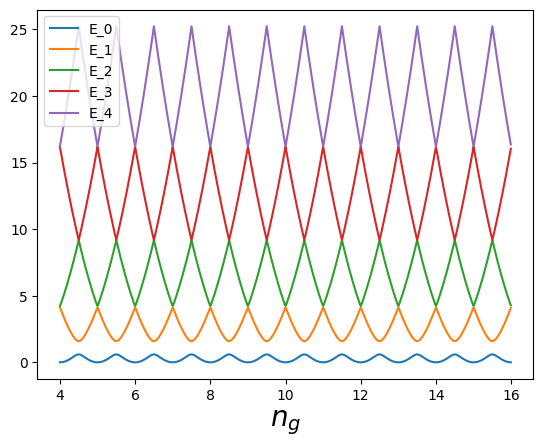

In [92]:
# ratio of Energy = 1
PlotEnergy(1)

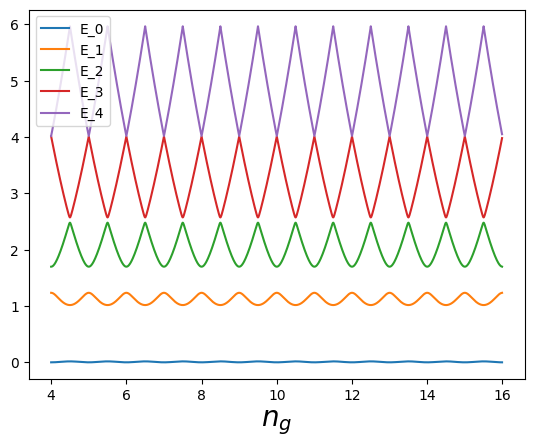

In [93]:
# ratio of Energy = 5
PlotEnergy(5)

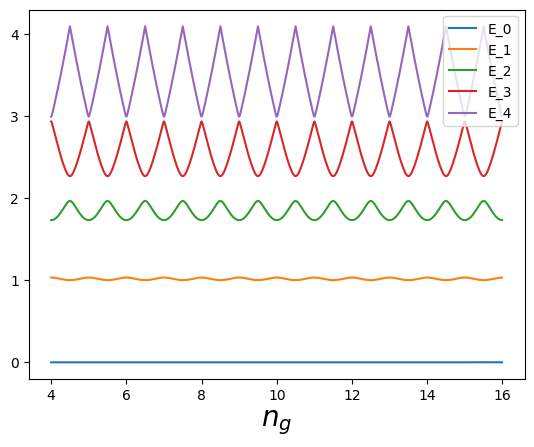

In [94]:
# ratio of Energy = 10
PlotEnergy(10)

In [ ]:
# ratio of Energy = 50
PlotEnergy(50)

### (d)
Write a code to Reproduce Figure 4 of the paper.

## Problem 2 - Rabi Oscillation

This problem is designed to understand the visualization of a two-level system control.

The Hamiltonian of a two level system driven by a classical drive is given by
$$
\hat{H} = -\frac{\omega_0}{2} \hat{\sigma}_z + \Omega_d \cos{(\omega_d t + \phi)} \hat{\sigma}_x
$$
Here, $\hat{\sigma}_z = |0\rangle\langle0| - |1\rangle\langle1|$ and $\hat{\sigma}_x = |0\rangle\langle1|+|1\rangle\langle0|$

### (a)
Transform the Hamiltonian into the frame rotating with the drive frequency $\omega_d$. This can be done by noting that the frame rotation $|\psi(t)\rangle \rightarrow U(t)|\psi(t)\rangle$ is accompanied by the Hamiltonian transformation of the form
$${H}\rightarrow UHU^\dagger + i\hbar \dot{U}U^\dagger.$$
Here, assume that $U(t) = e^{i\omega_d t |1\rangle \langle 1|}$. After applying the rotating-wave approximation, you will obtain a time-independent Hamiltonian in the rotating frame.

See https://en.wikipedia.org/wiki/Unitary_transformation_(quantum_mechanics) for details about this transformation.

### (b)
The phase $\phi$ can be set to be zero by redefining the spin operators. Assuming that the qubit was initialized in the ground state $|0\rangle$, perform numerical time evolution (during $0\le t \le 4\pi/\Omega_d$) to get expectation values of $\hat{\sigma}_x$, $\hat{\sigma}_y$, $\hat{\sigma}_z$ for $(\omega_d -\omega_0) / \Omega_d = -1.0, -0.5, 0.0, 0.5, 1.0$. Here use `mesolve` function of QuTiP.

Visualize the traces on the Bloch sphere using the instructions below.

### Visualization in a Bloch sphere: Instructions

In [ ]:
import numpy as np
from qutip import *
b = qutip.Bloch()

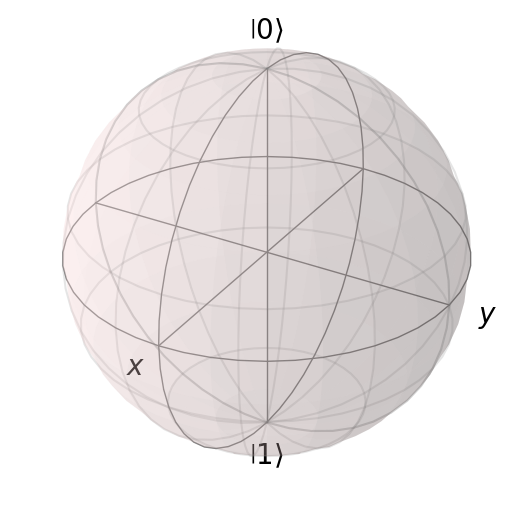

In [ ]:
b

In [ ]:
# adding points to the Bloch sphere
pnt = [1./np.sqrt(3), 1./np.sqrt(3), 1./np.sqrt(3)]
b.add_points(pnt)

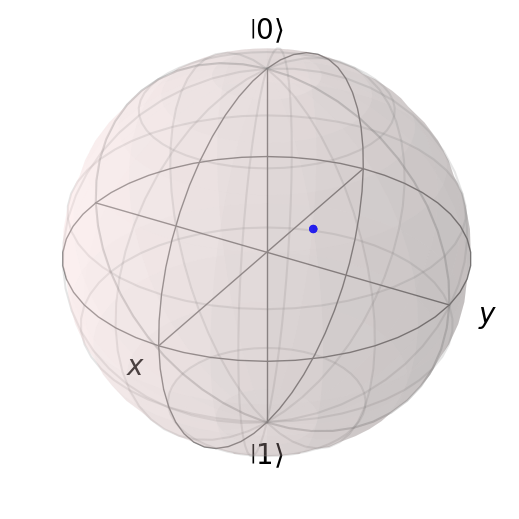

In [ ]:
b

In [ ]:
# adding a vector to the Bloch sphere
vec = [0, 1, 0]
b.add_vectors(vec)

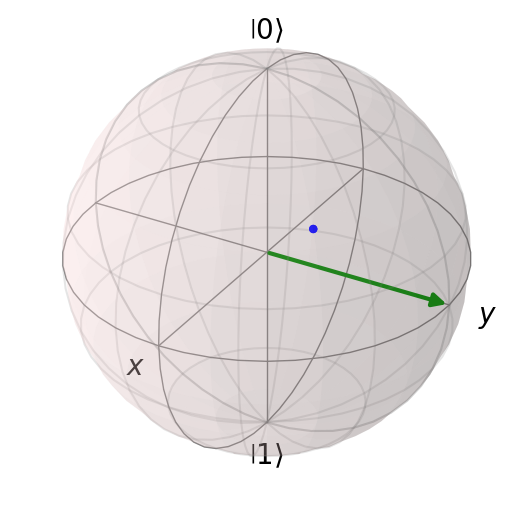

In [ ]:
b

In [ ]:
# adding a state vector to the Bloch sphere
up = basis(2, 0)
b.add_states(up)

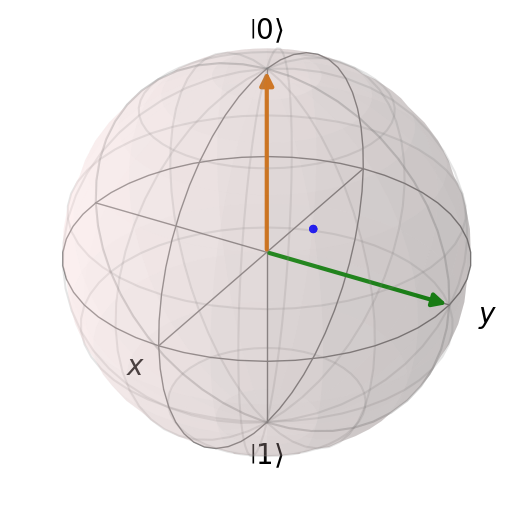

In [ ]:
b

### (c)
Repeat part (b) in the presence of collapse operator $\hat{c} = \sqrt{\Gamma_1}|0\rangle\langle1|$, where $\Gamma_1 = 0.1 / (2\pi/\Omega_d)$ is the relaxation rate of the qubit.